Objective:
The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.

Dataset: https://drive.google.com/file/d/1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_/view?usp=sharing


Key Components to be fulfilled:

Data Exploration: (Score : 1)
Explore the data, list down the unique values in each feature and find its length.
Perform the statistical analysis and renaming of the columns.

In [1]:
import pandas as pd

# Load the dataset (make sure to adjust the file path as necessary)
url = 'https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_'  # Google Drive direct link
df = pd.read_csv(url)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Step 3: List unique values and their lengths for each feature
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}, Unique Values: {len(unique_values)}, Values: {unique_values}")

# Step 4: Perform statistical analysis
print("Statistical analysis of the dataset:")
print(df.describe())

# Step 5: Rename columns if necessary (example of renaming)
df.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)

# Display the dataframe after renaming
print("DataFrame after renaming columns:")
print(df.head())


First few rows of the dataset:
   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0
Column: Company, Unique Values: 7, Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Column: Age, Unique Values: 30, Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Column: Salary, Unique Values: 41, Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Column: Place, Unique Values: 12, Values: ['Chennai' 'Mumbai' 'Calcutta' 'D

Data Cleaning: (Score : 2)
Find the missing and inappropriate values, treat them appropriately.
Remove all duplicate rows.
Find the outliers.
Replace the value 0 in age as NaN
Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

Identify and Treat Missing Values

Remove Duplicate Rows

Find Outliers

Implement the Cleaning Steps

In [4]:
print("Column names in the DataFrame:")
print(df.columns)


Column names in the DataFrame:
Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')


In [6]:
import pandas as pd
import numpy as np

# Load the dataset
url = 'https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_'  # Google Drive direct link
df = pd.read_csv(url)

# Step 1: Check the column names
print("Column names in the DataFrame:")
print(df.columns)

# Step 2: Identify and treat missing values
print("Initial missing values in each column:")
print(df.isnull().sum())

# Replace 0 in 'Age' column with NaN (assuming it's correctly named)
df['Age'].replace(0, np.nan, inplace=True)

# Check for inappropriate values (assuming age should not be negative)
df.loc[df['Age'] < 0, 'Age'] = np.nan  # Correctly set negative ages to NaN

# Step 3: Remove duplicates
df.drop_duplicates(inplace=True)

# Step 4: Handle missing values
# Fill missing values with mean, median, or mode
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].median(), inplace=True)

for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Step 5: Find outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()}")

# Optional: Remove outliers if needed
df_no_outliers = df[~outliers]

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_no_outliers.head())


Column names in the DataFrame:
Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')
Initial missing values in each column:
Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64
Number of outliers detected: 32
Cleaned DataFrame:
   Company   Age  Salary     Place Country  Gender
0      TCS  20.0  5000.0   Chennai   India       0
1  Infosys  30.0  5000.0    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0


<ipython-input-6-3b44d31ae87b>:43: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
<ipython-input-6-3b44d31ae87b>:43: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)


# Q2

Data Analysis: (Score : 2)
Filter the data with age >40 and salary<5000
Plot the chart with age and salary
Count the number of people from each place and represent it visually


Filter the Data

Plot a Chart:

Count the Number of People from Each Place:

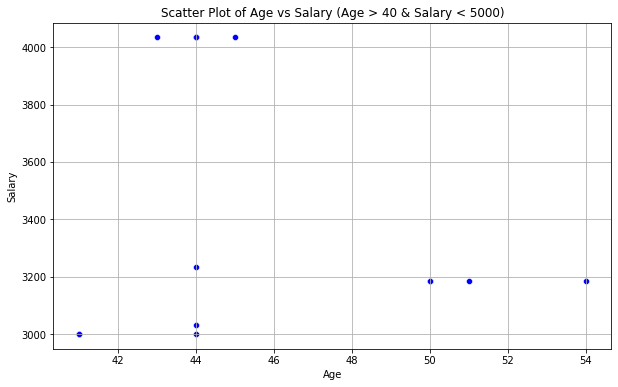

<ipython-input-7-704eac446d97>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=place_counts.index, y=place_counts.values, palette='viridis')


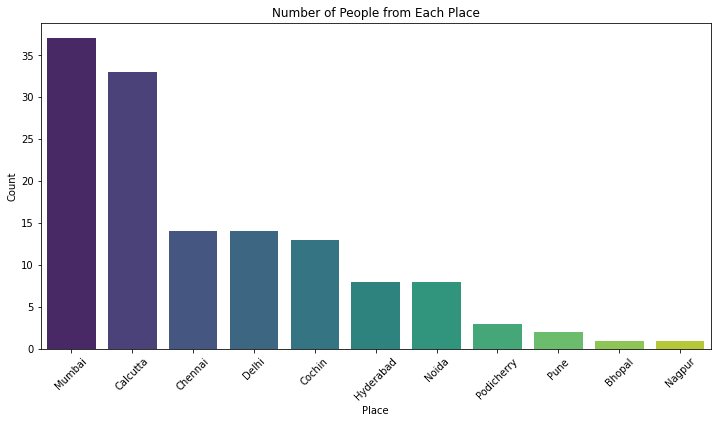

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_'  # Google Drive direct link
df = pd.read_csv(url)

# Step 1: Filter data for Age > 40 and Salary < 5000
filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]

# Step 2: Plot the relationship between Age and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Age', y='Salary', color='blue')
plt.title('Scatter Plot of Age vs Salary (Age > 40 & Salary < 5000)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.show()

# Step 3: Count the number of people from each place
place_counts = df['Place'].value_counts()

# Step 4: Visualize the counts of people from each place
plt.figure(figsize=(12, 6))
sns.barplot(x=place_counts.index, y=place_counts.values, palette='viridis')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Q3

Data Encoding: (Score : 2)
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

Identify Categorical Variables

Apply Encoding

In [9]:
import pandas as pd

# Load the dataset
url = 'https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_'  # Google Drive direct link
df = pd.read_csv(url)

# Step 1: Identify categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Display the categorical columns
print("Categorical Columns:", categorical_cols)

# Step 2: Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the shape of the original and encoded DataFrame
print("Original DataFrame Shape:", df.shape)
print("Encoded DataFrame Shape:", df_encoded.shape)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())


Categorical Columns: ['Company', 'Place', 'Country']
Original DataFrame Shape: (148, 6)
Encoded DataFrame Shape: (148, 18)
    Age  Salary  Gender  Company_Congnizant  Company_Infosys  \
0  20.0     NaN       0                   0                0   
1  30.0     NaN       0                   0                1   
2  35.0  2300.0       0                   0                0   
3  40.0  3000.0       0                   0                1   
4  23.0  4000.0       0                   0                0   

   Company_Infosys Pvt Lmt  Company_TCS  Company_Tata Consultancy Services  \
0                        0            1                                  0   
1                        0            0                                  0   
2                        0            1                                  0   
3                        0            0                                  0   
4                        0            1                                  0   

   Place_Calcutta  Plac

In [11]:
import pandas as pd

# Load the dataset
url = 'https://drive.google.com/uc?id=1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_'  # Google Drive direct link
df = pd.read_csv(url)

# Step 1: Display the columns in the DataFrame
print("Columns in the DataFrame:", df.columns.tolist())


Columns in the DataFrame: ['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender']


Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Apply label encoding to 'Gender'
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Display the transformed DataFrame
print(df['Gender'])


0      0
1      0
2      0
3      0
4      0
      ..
143    1
144    1
145    1
146    1
147    0
Name: Gender, Length: 148, dtype: int64


# Q4

Feature Scaling: (Score : 2)
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Sample DataFrame for illustration
data = {
    'Company_A': [1, 0, 0, 1, 0],
    'Company_B': [0, 1, 0, 0, 1],
    'Age': [25, 30, 35, 40, 45],
    'Salary': [5000, 6000, 7000, 8000, 9000],
    'Place_X': [1, 0, 0, 1, 0],
    'Place_Y': [0, 1, 0, 0, 1],
    'Country_USA': [1, 1, 0, 1, 0],
    'Country_Canada': [0, 0, 1, 0, 1],
    'Gender_M': [1, 0, 1, 0, 1]
}

df_encoded = pd.DataFrame(data)

# Initialize the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Features to scale
features_to_scale = ['Age', 'Salary']

# Standard Scaling
df_encoded[features_to_scale] = standard_scaler.fit_transform(df_encoded[features_to_scale])

# Min-Max Scaling
# You can also create a separate DataFrame for min-max scaled values
df_minmax_scaled = df_encoded.copy()
df_minmax_scaled[features_to_scale] = minmax_scaler.fit_transform(df_encoded[features_to_scale])

# Display the transformed DataFrames
print("Standard Scaled DataFrame:\n", df_encoded)
print("\nMin-Max Scaled DataFrame:\n", df_minmax_scaled)


Standard Scaled DataFrame:
    Company_A  Company_B       Age    Salary  Place_X  Place_Y  Country_USA  \
0          1          0 -1.414214 -1.414214        1        0            1   
1          0          1 -0.707107 -0.707107        0        1            1   
2          0          0  0.000000  0.000000        0        0            0   
3          1          0  0.707107  0.707107        1        0            1   
4          0          1  1.414214  1.414214        0        1            0   

   Country_Canada  Gender_M  
0               0         1  
1               0         0  
2               1         1  
3               0         0  
4               1         1  

Min-Max Scaled DataFrame:
    Company_A  Company_B   Age  Salary  Place_X  Place_Y  Country_USA  \
0          1          0  0.00    0.00        1        0            1   
1          0          1  0.25    0.25        0        1            1   
2          0          0  0.50    0.50        0        0            0   
3      